<a href="https://colab.research.google.com/github/JishnuParameswaran/ML-Project/blob/main/PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Thyroid Disease Classification***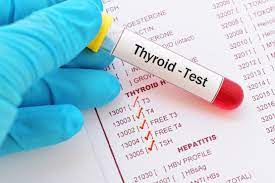

age of the patient

sex - sex patient identifies

on_thyroxine - whether patient is on thyroxine

query on thyroxine - *whether patient is on thyroxine

on antithyroid meds - whether patient is on antithyroid meds

sick - whether patient is sick

pregnant - whether patient is pregnant

thyroid_surgery - whether patient has undergone thyroid surgery

I131_treatment - whether patient is undergoing I131 treatment

query_hypothyroid - whether patient believes they have hypothyroid

query_hyperthyroid - whether patient believes they have hyperthyroid

lithium - whether patient * lithium

goitre - whether patient has goitre

tumor - whether patient has tumor

hypopituitary - whether patient * hyperpituitary gland

psych - whether patient * psych

TSH_measured - whether TSH was measured in the blood

TSH - TSH level in blood from lab work

T3_measured - whether T3 was measured in the blood

T3 - T3 level in blood from lab work

TT4_measured - whether TT4 was measured in the blood

TT4 - TT4 level in blood from lab work

T4U_measured - whether T4U was measured in the blood

T4U - T4U level in blood from lab work

FTI_measured - whether FTI was measured in the blood

FTI - FTI level in blood from lab work

TBG_measured - whether TBG was measured in the blood

TBG - TBG level in blood from lab work

referral_source -

target - hyperthyroidism medical diagnosis

patient_id - unique id of the patient



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/luminar/mlproject/thyroidDF.csv')

print(df)

      age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0      29   F            f                  f                   f    f   
1      29   F            f                  f                   f    f   
2      41   F            f                  f                   f    f   
3      36   F            f                  f                   f    f   
4      32   F            f                  f                   f    f   
...   ...  ..          ...                ...                 ...  ...   
9167   56   M            f                  f                   f    f   
9168   22   M            f                  f                   f    f   
9169   69   M            f                  f                   f    f   
9170   47   F            f                  f                   f    f   
9171   31   M            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0           f               f    

In [ ]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

df['target'] = df['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
# df.dropna(subset=['target'], inplace=True)

# **Preprocessing**

In [ ]:
# Check for missing values
print(df.isnull().sum())

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                 1626
patient_id                0
dtype: int64


In [ ]:
# Drop irrelevant columns
df.drop(['patient_id', 'referral_source'], axis=1, inplace=True)


In [ ]:
# Convert categorical columns to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
categorical_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick',
                    'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
                    'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
                    'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured',
                    'TBG_measured','target']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Fill missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

In [ ]:
print(df.isnull().sum())

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
target                 0
dtype: int64


In [ ]:
# Perform feature scaling using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
#EDA

In [ ]:
# Understanding the Data
print("Data dimensions:", df.shape)
print("Data information:")
print(df.info())
print("Data summary statistics:")
print(df.describe())

Data dimensions: (9172, 29)
Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   int64  
 2   on_thyroxine         9172 non-null   int64  
 3   query_on_thyroxine   9172 non-null   int64  
 4   on_antithyroid_meds  9172 non-null   int64  
 5   sick                 9172 non-null   int64  
 6   pregnant             9172 non-null   int64  
 7   thyroid_surgery      9172 non-null   int64  
 8   I131_treatment       9172 non-null   int64  
 9   query_hypothyroid    9172 non-null   int64  
 10  query_hyperthyroid   9172 non-null   int64  
 11  lithium              9172 non-null   int64  
 12  goitre               9172 non-null   int64  
 13  tumor                9172 non-null   int64  
 14  hypopituitary        9172 non-null   int64

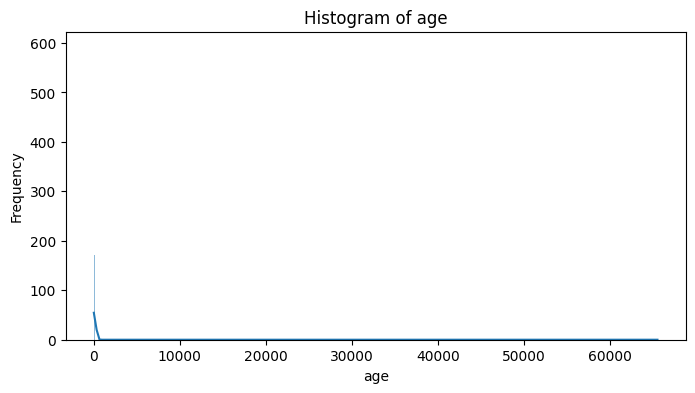

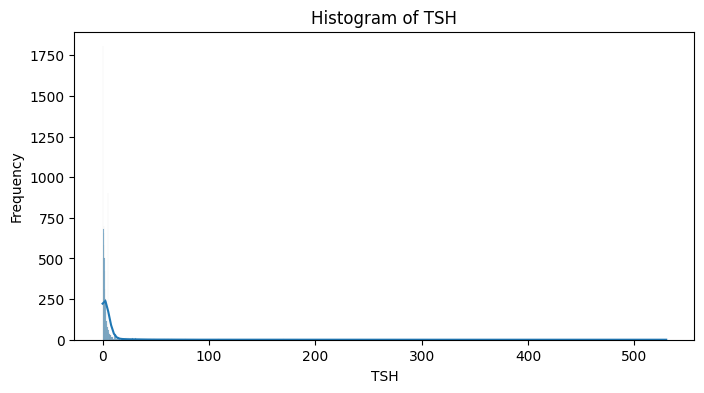

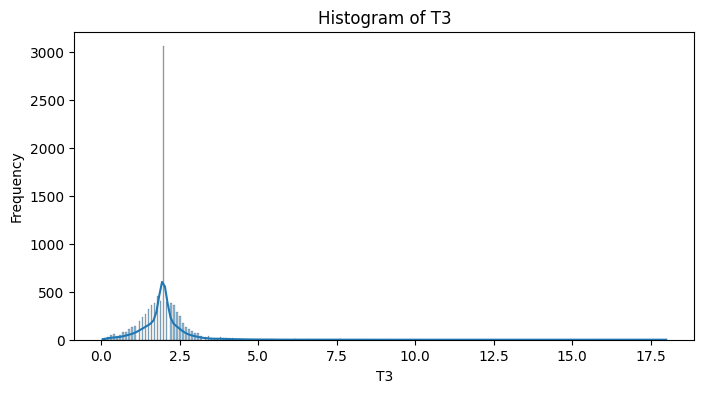

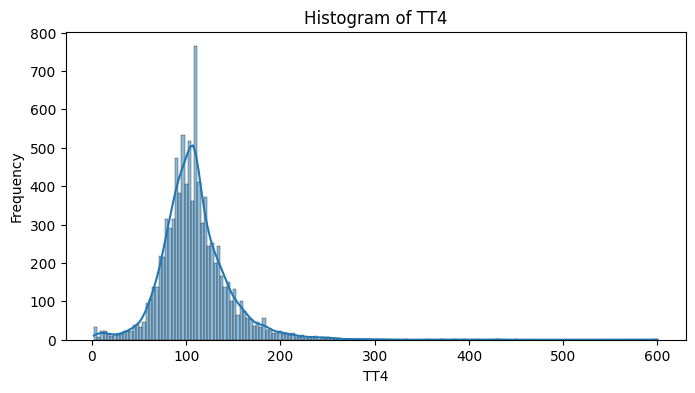

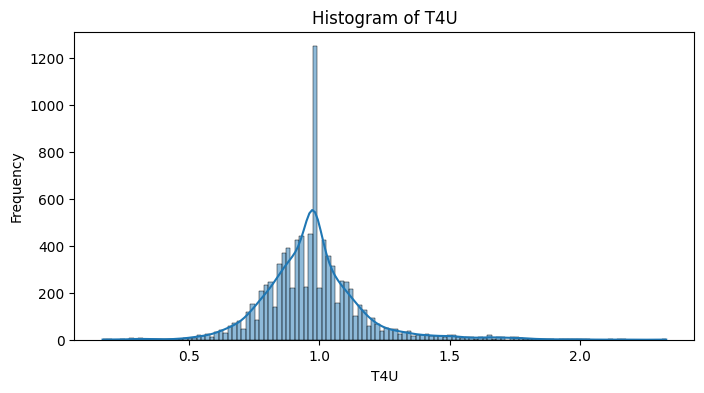

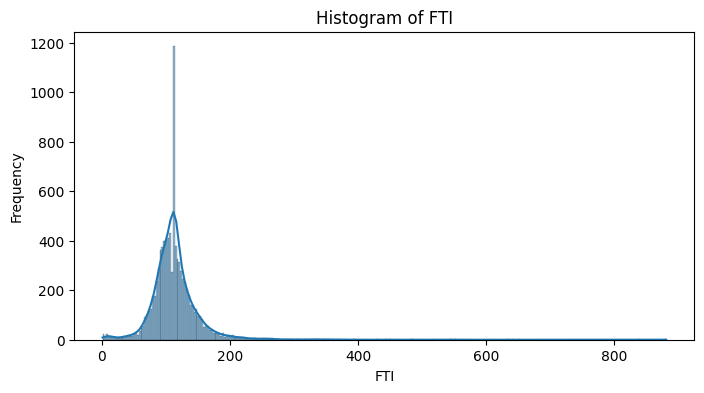

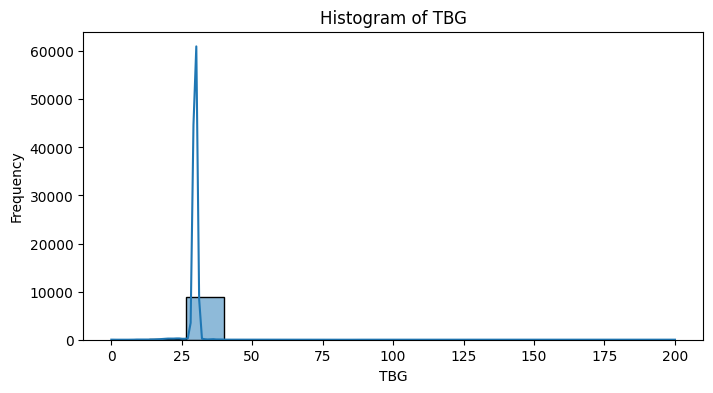

In [ ]:
# Data Visualization
# Plot histogram for numerical features
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

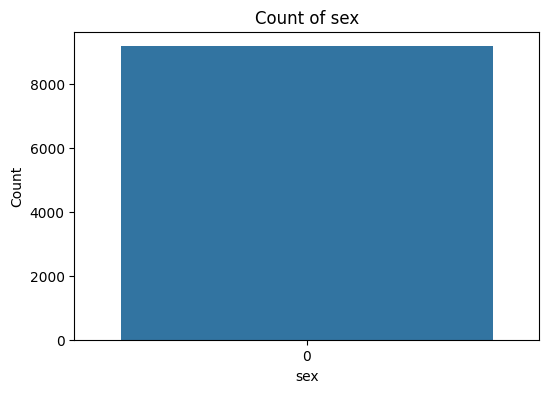

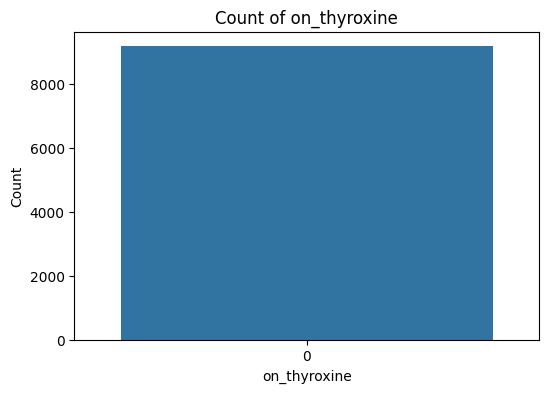

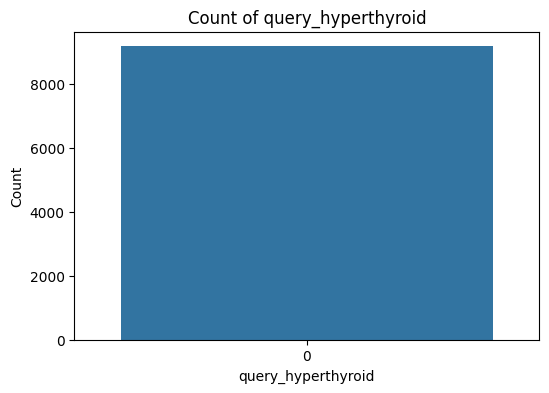

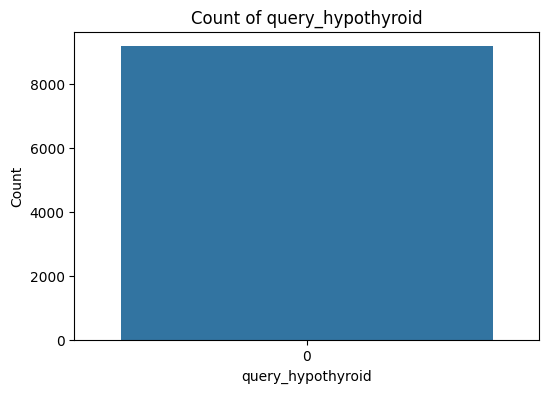

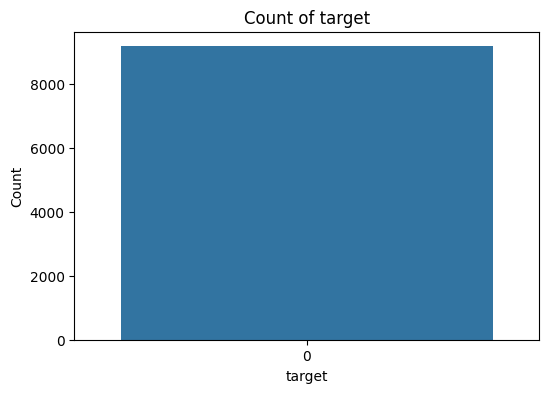

In [ ]:
# Plot bar chart for categorical features
categorical_features = ['sex', 'on_thyroxine', 'query_hyperthyroid', 'query_hypothyroid', 'target']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(df[feature])
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

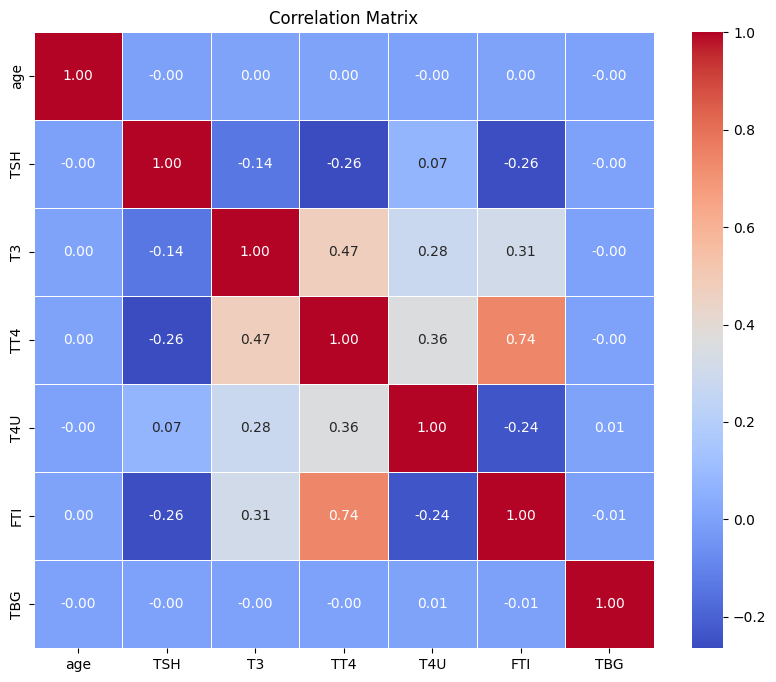

In [ ]:
# Step 4: Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

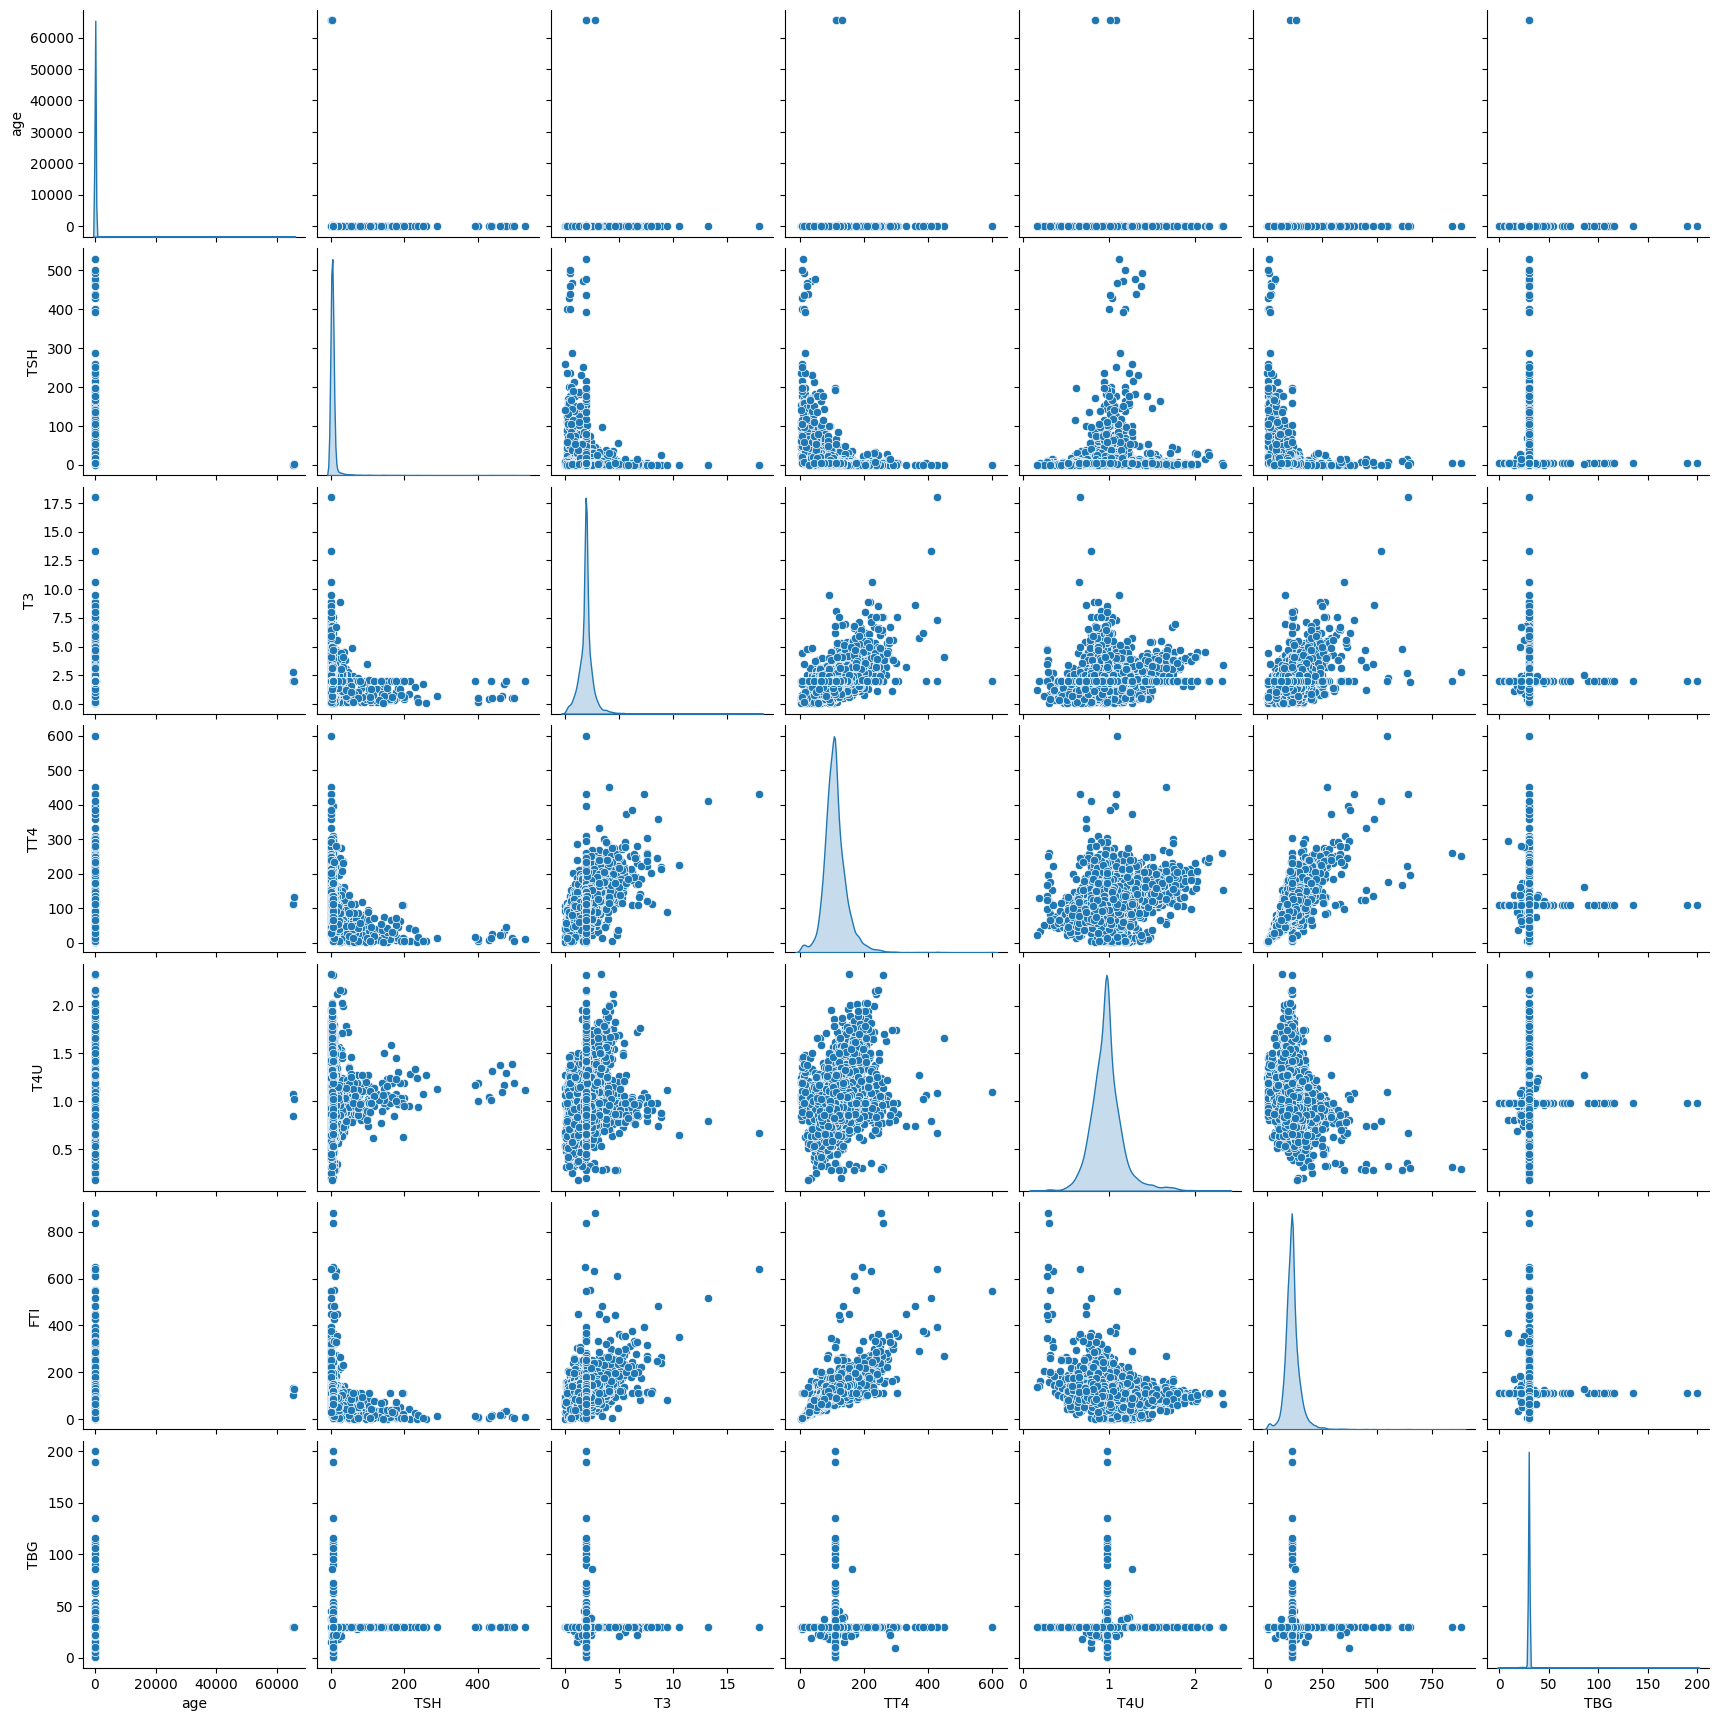

In [ ]:
# Step 5: Feature Relationships
sns.pairplot(df[numerical_features], diag_kind='kde')
plt.show()

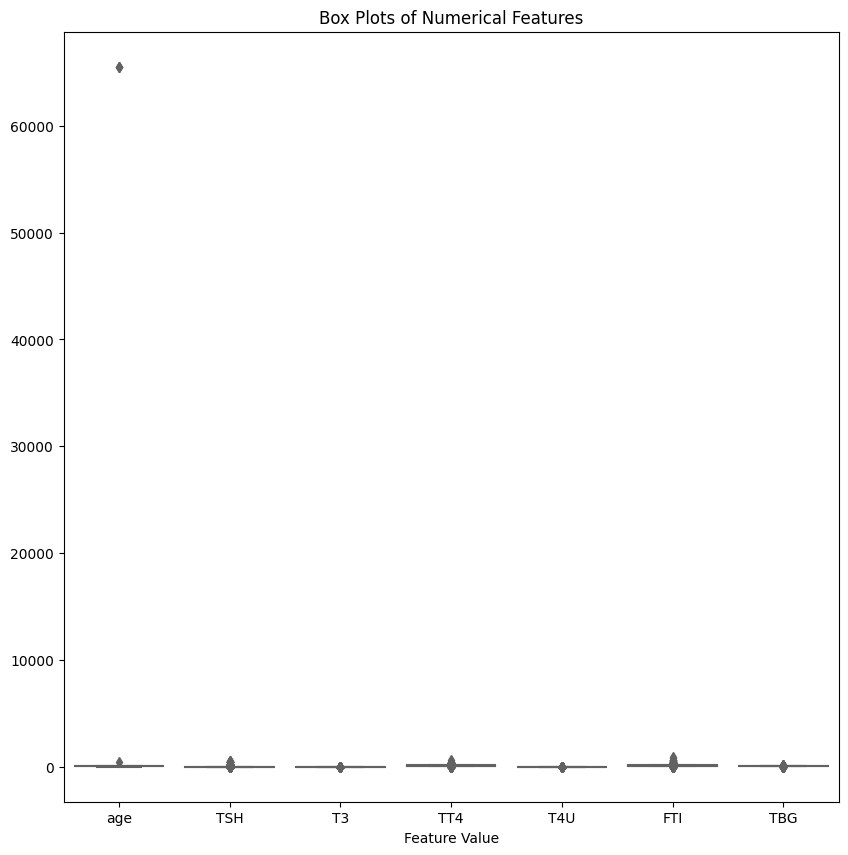

In [ ]:
# Box Plots for Distributions and Outliers
plt.figure(figsize=(10, 10))
sns.boxplot(data=df[numerical_features], orient='v', palette='Set3')
plt.title('Box Plots of Numerical Features')
plt.xlabel('Feature Value')
plt.show()

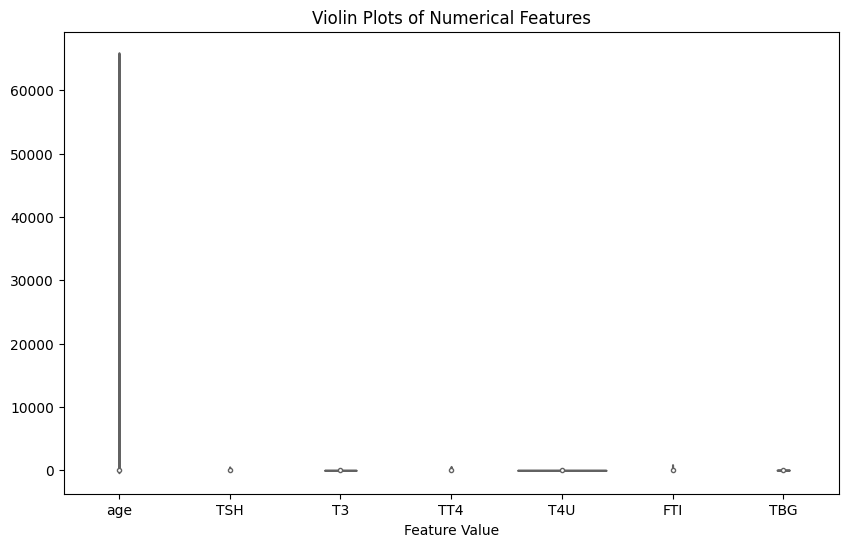

In [ ]:
# Step 12: Violin Plots for Distribution of Numerical Data
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[numerical_features], orient='v', palette='Set3')
plt.title('Violin Plots of Numerical Features')
plt.xlabel('Feature Value')
plt.show()

In [ ]:
# Removing Outliers using Z-score
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
z_scores = np.abs((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std())
threshold = 3  # Define the threshold for outlier removal (e.g., 3 standard deviations)

data_no_outliers = df[(z_scores < threshold).all(axis=1)]

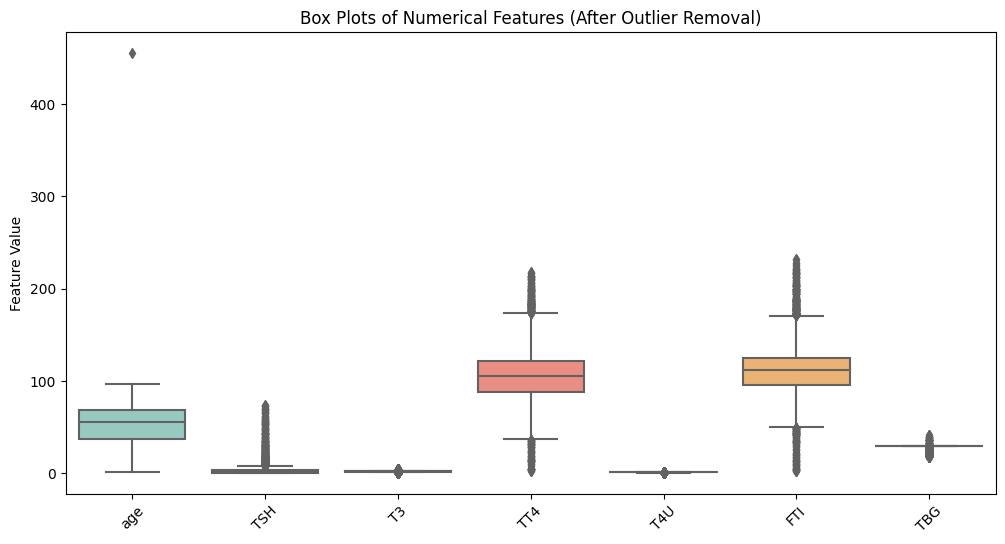

In [ ]:
# Data Visualization with Box Plots (after outlier removal)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[numerical_features], orient='v', palette='Set3')
plt.title('Box Plots of Numerical Features (After Outlier Removal)')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)
plt.show()


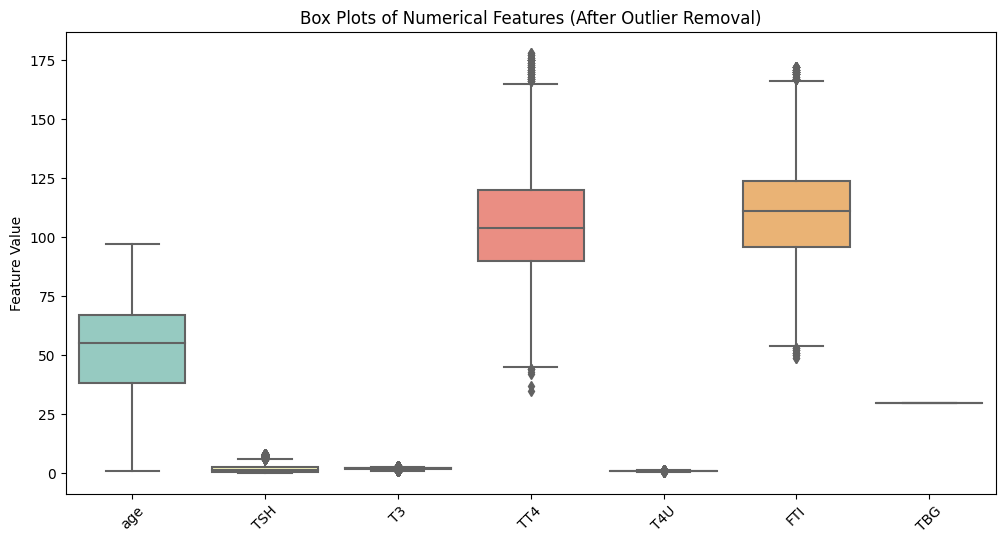

In [ ]:
# Step 3: Removing Outliers using IQR
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define the multiplier for the IQR method
outlier_multiplier = 1.5

lower_bound = Q1 - outlier_multiplier * IQR
upper_bound = Q3 + outlier_multiplier * IQR

data_no_outliers = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers[numerical_features], orient='v', palette='Set3')
plt.title('Box Plots of Numerical Features (After Outlier Removal)')
plt.ylabel('Feature Value')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='target', ylabel='TBG'>

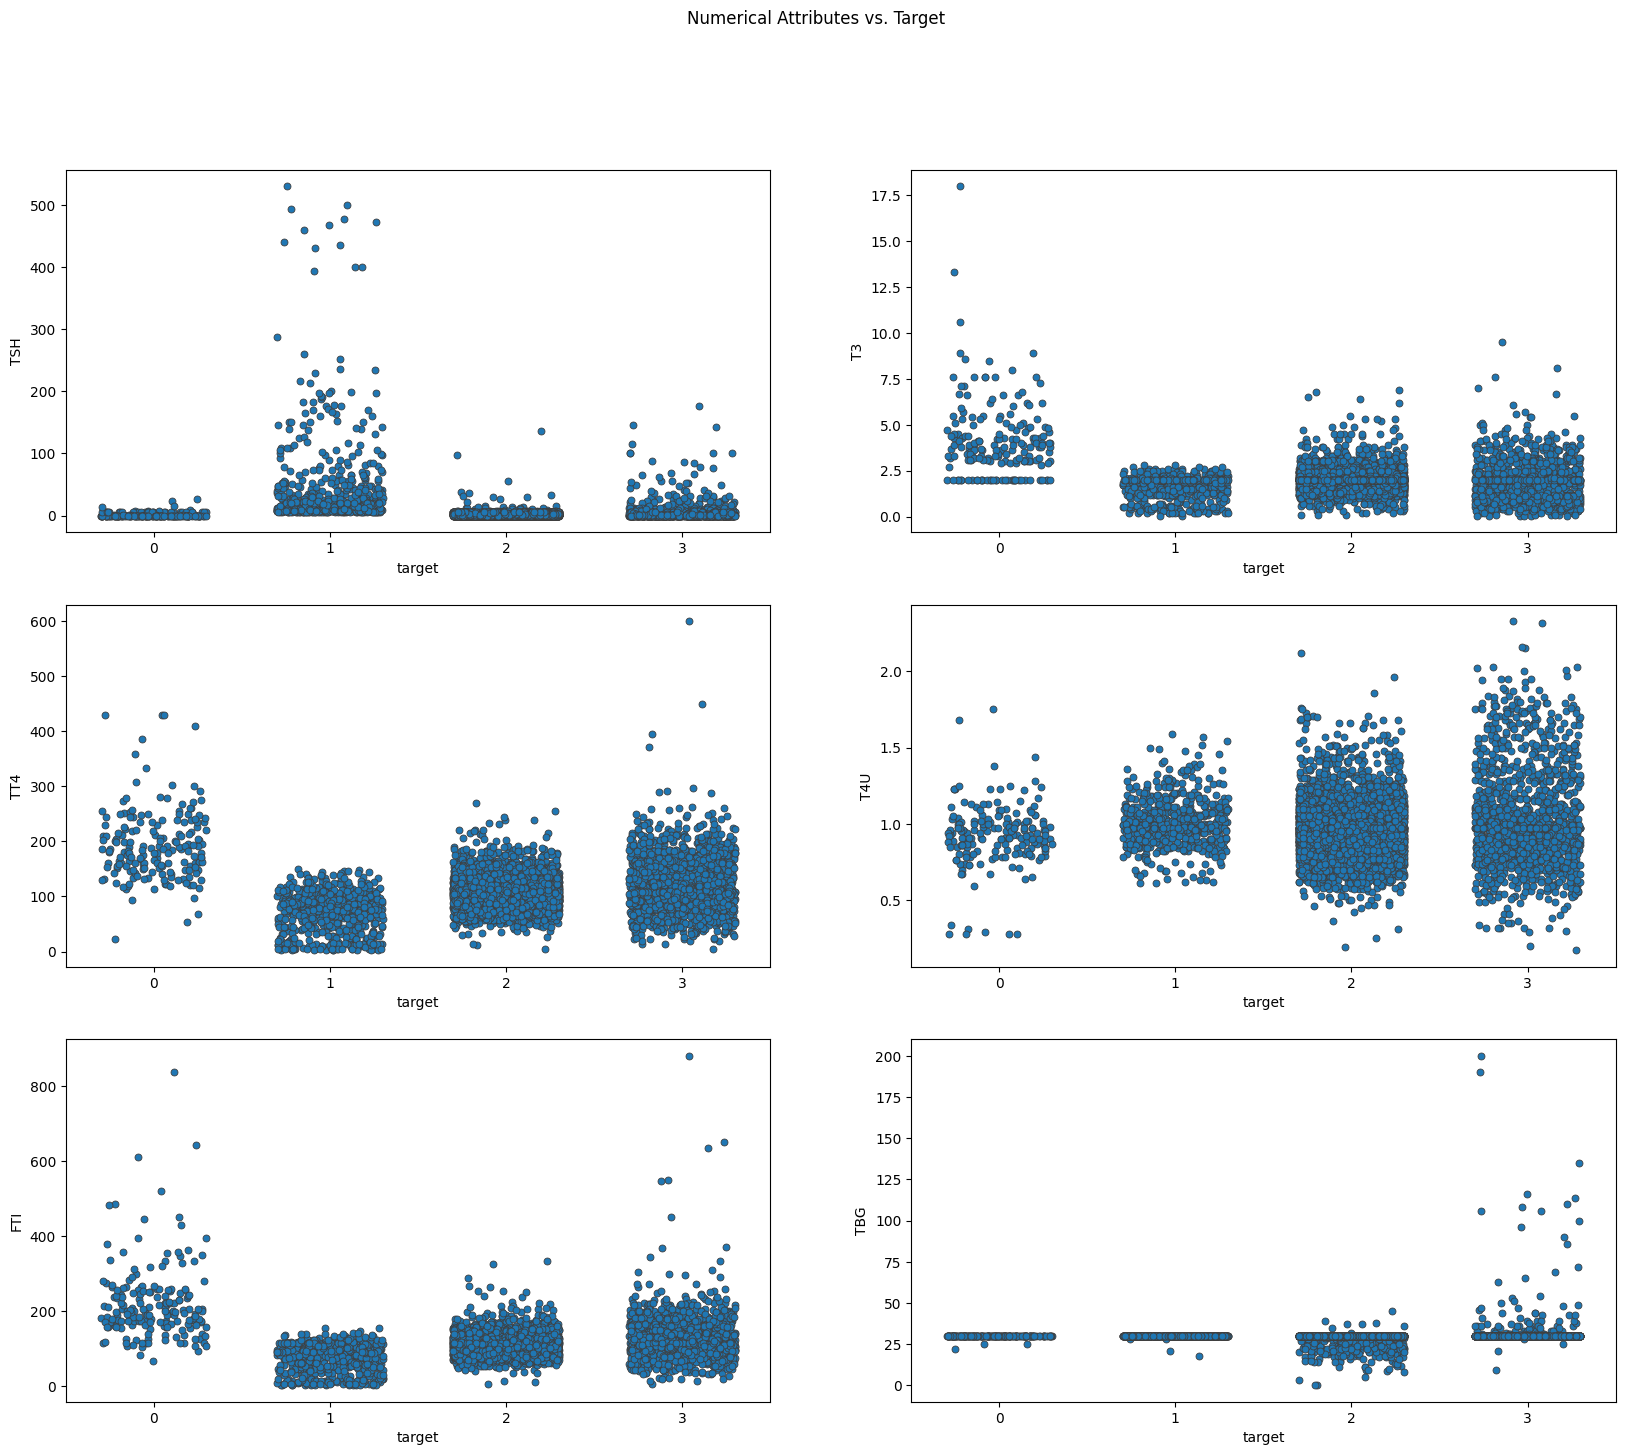

In [ ]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=df.target, y=df.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=df.target, y=df.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=df.target, y=df.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=df.target, y=df.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=df.target, y=df.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=df.target, y=df.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

In [ ]:
#Feature engineering

In [ ]:
#  Create Age Bins
df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])

In [ ]:
# Encode the 'sex' column
encoder = OneHotEncoder(drop='first', sparse=False)
sex_encoded = encoder.fit_transform(df[['sex']])

# Convert the encoded array to a DataFrame with column names
sex_encoded_df = pd.DataFrame(sex_encoded, columns=[f'is_male_{i}' for i in range(sex_encoded.shape[1])])

# Concatenate the encoded DataFrame with the original DataFrame 'data'
data = pd.concat([df, sex_encoded_df], axis=1)

# # Drop the original 'sex' column if needed
# data.drop(columns=['sex'], inplace=True)

In [ ]:
#  Calculate Ratios
data['T3_TT4_ratio'] = data['T3'] / data['TT4']
data['T4U_FTI_ratio'] = data['T4U'] / data['FTI']

In [ ]:
# Target Encoding (using frequency encoding)
target_counts = data['target'].value_counts()
data['target_encoding'] = data['target'].map(target_counts / len(data))

In [ ]:
#  Interaction Features
data['TSH_TT4_interaction'] = data['TSH'] * data['TT4']
data['T3_FT4_interaction'] = data['T3'] * data['FTI']

In [ ]:
# Create new feature(s)

#  Combine existing features
df['total_thyroxine'] = df['on_thyroxine'] + df['query_on_thyroxine']

In [ ]:
#  Apply mathematical transformation
df['T3_squared'] = np.square(df['T3'])

In [ ]:
# Drop original columns used to create new features
df.drop(['on_thyroxine', 'query_on_thyroxine', 'TSH', 'TT4', 'T3'], axis=1, inplace=True)

In [ ]:
# Convert the 'age_bin' column into numerical using one-hot encoding
age_bin_encoded = pd.get_dummies(df['age_bin'], drop_first=True)
df = pd.concat([df, age_bin_encoded], axis=1)

# Drop the original 'age_bin' column if needed
df.drop(columns=['age_bin'], inplace=True)

In [ ]:
#Appling the model

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
print(X)

      age  sex  on_antithyroid_meds  sick  pregnant  thyroid_surgery  \
0      29    0                    0     0         0                0   
1      29    0                    0     0         0                0   
2      41    0                    0     0         0                0   
3      36    0                    0     0         0                0   
4      32    0                    0     0         0                0   
...   ...  ...                  ...   ...       ...              ...   
9167   56    1                    0     0         0                0   
9168   22    1                    0     0         0                0   
9169   69    1                    0     0         0                0   
9170   47    0                    0     0         0                0   
9171   31    1                    0     0         0                0   

      I131_treatment  query_hypothyroid  query_hyperthyroid  lithium  ...  \
0                  0                  1                   

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42,probability=True,decision_function_shape='ovr')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine (SVM) Accuracy: 0.7716621253405994
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.52      0.45        25
           1       0.79      0.44      0.56       109
           2       0.78      0.99      0.87      1328
           3       0.86      0.10      0.18       373

    accuracy                           0.77      1835
   macro avg       0.71      0.51      0.52      1835
weighted avg       0.79      0.77      0.71      1835

Confusion Matrix:
[[  13    0   12    0]
 [   0   48   61    0]
 [   4    1 1317    6]
 [  16   12  307   38]]


In [ ]:
#  KNeighborsClassifier

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_knn = knn_model.predict(X_test)


In [ ]:
# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Accuracy: 0.7836512261580382
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.44      0.39        25
           1       0.40      0.30      0.35       109
           2       0.82      0.95      0.88      1328
           3       0.75      0.35      0.48       373

    accuracy                           0.78      1835
   macro avg       0.58      0.51      0.52      1835
weighted avg       0.77      0.78      0.76      1835

Confusion Matrix:
[[  11    0    4   10]
 [   0   33   72    4]
 [   5   30 1262   31]
 [  15   19  207  132]]


In [ ]:
# GradientBoostingClassifier

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred_gb = gb_model.predict(X_test)


In [ ]:
feature_names = X_train.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['age', 'sex', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'total_thyroxine', 'TSH_TT4_ratio', 'T3_squared', '21-40', '41-60', '61+']


In [ ]:
# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9122615803814714
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        25
           1       0.84      0.84      0.84       109
           2       0.94      0.96      0.95      1328
           3       0.85      0.80      0.82       373

    accuracy                           0.91      1835
   macro avg       0.79      0.79      0.79      1835
weighted avg       0.91      0.91      0.91      1835



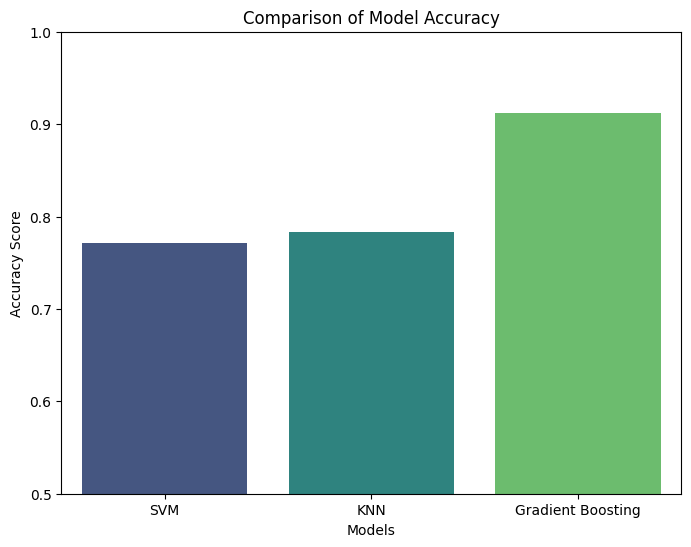

In [ ]:
# Accuracy scores for SVM, KNN, and Gradient Boosting
accuracy_scores = [accuracy_svm, accuracy_knn, accuracy_gb]
models = ['SVM', 'KNN', 'Gradient Boosting']

# Create a bar plot to compare accuracy scores
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy')
plt.ylim(0.5, 1.0)  # Set the y-axis range for better visualization
plt.show()

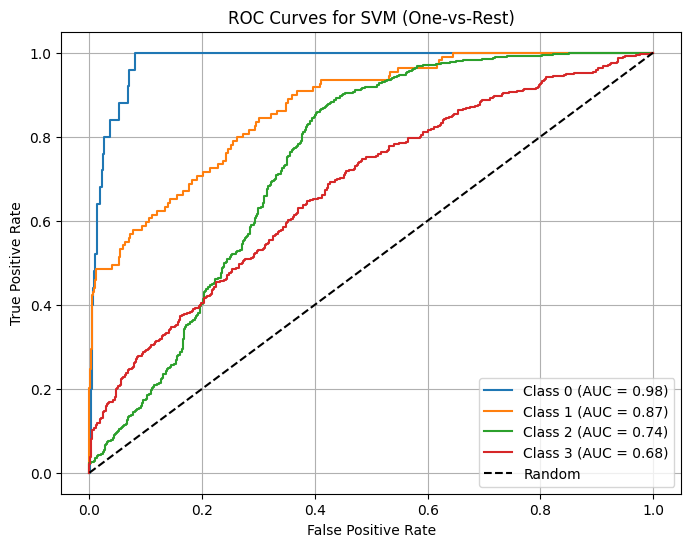

In [ ]:

# Get the decision function scores for each class
y_scores_svm = svm_model.decision_function(X_test)

# Calculate the ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(svm_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == svm_model.classes_[i], y_scores_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(svm_model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f"Class {svm_model.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for SVM (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#hyper parameter tuning on svm and knn

In [ ]:
# # Define the hyperparameter grid for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
# }

# # Create the GridSearchCV object with SVM model and hyperparameter grid
# grid_search_svm = GridSearchCV(svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object on the training data to find the best hyperparameters
# grid_search_svm.fit(X_train, y_train)

# # Get the best hyperparameters for SVM
# best_params_svm = grid_search_svm.best_params_

# # Create the SVM model with the best hyperparameters
# svm_model_best = SVC(kernel='linear', C=best_params_svm['C'], gamma=best_params_svm['gamma'], random_state=42)

# # Train the SVM model with the best hyperparameters on the entire training data
# svm_model_best.fit(X_train, y_train)

# # Predict on the test data using the tuned SVM model
# y_pred_svm = svm_model_best.predict(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}

# Create the RandomizedSearchCV object with SVM model and hyperparameter grid
random_search_svm = RandomizedSearchCV(svm_model, param_distributions=param_dist_svm, n_iter=1, cv=5, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object on the training data to find the best hyperparameters
random_search_svm.fit(X_train, y_train)

# Get the best hyperparameters for SVM
best_params_svm = random_search_svm.best_params_

# Create the SVM model with the best hyperparameters
svm_model_best = SVC(kernel='linear', C=best_params_svm['C'], gamma=best_params_svm['gamma'], random_state=42)

# Train the SVM model with the best hyperparameters on the entire training data
svm_model_best.fit(X_train, y_train)

# Predict on the test data using the tuned SVM model
y_pred_svm = svm_model_best.predict(X_test)

In [ ]:
# Calculate the accuracy of the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Best Hyperparameters for SVM:", best_params_svm)
print("Accuracy of Tuned SVM Model:", accuracy_svm)

Best Hyperparameters for SVM: {'gamma': 'auto', 'C': 0.1}
Accuracy of Tuned SVM Model: 0.7634877384196185


In [ ]:

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object with KNN model and hyperparameter grid
grid_search_knn = GridSearchCV(knn_model, param_grid=param_grid_knn, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data to find the best hyperparameters
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_

# Create the KNN model with the best hyperparameters
knn_model_best = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'])

# Train the KNN model with the best hyperparameters on the entire training data
knn_model_best.fit(X_train, y_train)

# Predict on the test data using the tuned KNN model
y_pred_knn = knn_model_best.predict(X_test)

# Calculate the accuracy of the tuned KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Best Hyperparameters for KNN:", best_params_knn)
print("Accuracy of Tuned KNN Model:", accuracy_knn)

Best Hyperparameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of Tuned KNN Model: 0.7956403269754768


In [ ]:
#New data

In [ ]:
# Fit the Gradient Boosting model on the entire dataset
gb_model.fit(X, y)

# Create new data for prediction
new_data = pd.DataFrame({
    'age': [35],  # Example age value
    'sex': ['F'],  # Example sex value
    'on_thyroxine': ['f'],
    'query_on_thyroxine': ['f'],
    'on_antithyroid_meds': ['f'],
    'sick': ['f'],
    'pregnant': ['f'],
    'thyroid_surgery': ['f'],
    'I131_treatment': ['f'],
    'query_hypothyroid': ['f'],
    'query_hyperthyroid': ['f'],
    'lithium': ['f'],
    'goitre': ['f'],
    'tumor': ['f'],
    'hypopituitary': ['f'],
    'psych': ['f'],
    'TSH_measured': ['t'],
    'TSH': [2.5],  # Example TSH value
    'T3_measured': ['t'],
    'T3': [2.0],  # Example T3 value
    'TT4_measured': ['t'],
    'TT4': [120],  # Example TT4 value
    'T4U_measured': ['t'],
    'T4U': [1.0],  # Example T4U value
    'FTI_measured': ['t'],
    'FTI': [120],  # Example FTI value
    'TBG_measured': ['f'],
    'TBG': [0],  # Example TBG value
    '21-40': [1],  # Example value
    '41-60': [0],  # Example value
    '61+': [0],  # Example value
    'T3_FT4_interaction': [0.008],  # Example value
    'T3_TT4_ratio': [0.04],  # Example value
    'T4U_FTI_ratio': [0.007],  # Example value
    'TSH_TT4_interaction': [0.001],  # Example value
    'is_male_0': [0],  # Example value
    'is_male_1': [1],  # Example value
    'target_encoding': [0.2],  # Example value
    'total_thyroxine':[0.02],
    'TSH_TT4_ratio':[0.04],
    'T3_squared':[3.38],
})

# Convert categorical features to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
                        'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
                        'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
                        'T4U_measured', 'FTI_measured', 'TBG_measured']
for feature in categorical_features:
    new_data[feature] = label_encoder.fit_transform(new_data[feature])

# Ensure the order of features in new_data matches the order of features in X
new_data = new_data[X.columns]

# Make predictions on the new data
new_predictions = gb_model.predict(new_data)

# Print the predictions
print("New Predictions:", new_predictions)

New Predictions: [2]


In [ ]:
# Streamlit

In [ ]:
# # Install required libraries
# !pip install streamlit
# !pip install pyngrok
# !pip install pandas
# !pip install scikit-learn

# # Import necessary libraries
# import streamlit as st
# import pandas as pd
# import numpy as np
# from PIL import Image
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler
# import joblib

# # Load your trained model
# gb_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/luminar/mlproject/gb_model.joblib')  # Replace with the path to your saved model

# # Load your image
# image = Image.open('/content/drive/MyDrive/Colab Notebooks/luminar/mlproject/thyroid234.jpeg')  # Replace with the path to your image

# # Display the image
# st.image(image, width=200)
# st.title('Thyroid Prediction App')

# # Get user input
# age = st.number_input('Age:')
# sex = st.selectbox('Sex:', ['F', 'M'])
# on_antithyroid_meds = st.selectbox('on_antithyroid_meds:', ['f', 't'])
# sick = st.selectbox('sick :', ['f', 't'])
# pregnant = st.selectbox('pregnant:', ['f', 't'])
# thyroid_surgery = st.selectbox('thyroid_surgery:', ['f', 't'])
# I131_treatment = st.selectbox('I131_treatment:', ['f', 't'])
# query_hypothyroid = st.selectbox('query_hypothyroid:', ['f', 't'])
# query_hyperthyroid = st.selectbox('query_hyperthyroid:', ['f', 't'])
# lithium = st.selectbox('lithium:', ['f', 't'])
# goitre = st.selectbox('goitre:', ['f', 't'])
# tumor = st.selectbox('tumor:', ['f', 't'])
# hypopituitary = st.selectbox('hypopituitary:', ['f', 't'])
# psych = st.selectbox('psych:', ['f', 't'])
# TSH_measured = st.selectbox('TSH_measured:', ['f', 't'])
# T3_measured = st.selectbox('T3_measured:', ['f', 't'])
# TT4_measured = st.selectbox('TT4_measured:', ['f', 't'])
# T4U_measured = st.selectbox('T4U_measured:', ['f', 't'])
# T4U = st.number_input('T4U:')
# FTI_measured = st.selectbox('FTI_measured:', ['f', 't'])
# FTI = st.number_input('FTI:') # Example FTI value
# TBG_measured = st.selectbox('TBG_measured:', ['f', 't'])
# TBG = st.number_input('TBG:')  # Example TBG value
# total_thyroxine = st.number_input('total_thyroxine:')
# TSH_TT4_ratio = st.number_input('TSH_TT4_ratio:')
# T3_squared = st.number_input('T3_squared:')


# # on_thyroxine = st.selectbox('On Thyroxine:', ['f', 't'])
# # query_on_thyroxine = st.selectbox('query_on_thyroxine:', ['f', 't'])
# # I131_treatment = st.selectbox('I131_treatment:', ['f', 't'])
# # TSH = st.number_input('TSH:')  # Example TSH value
# # T3 = st.number_input('T3:')
# # TT4 = st.number_input('TT4:')

# # TBG_measured = st.selectbox('TBG_measured:', ['f', 't'])
# # TBG = st.number_input('TBG:')  # Example TBG value
# # T3_FT4_interaction = st.number_input('T3_FT4_interaction:')   # Example value
# # T3_TT4_ratio = st.number_input('T3_TT4_ratio:')  # Example value
# # T4U_FTI_ratio = st.number_input('T4U_FTI_ratio:')   # Example value
# # TSH_TT4_interaction = st.number_input('TSH_TT4_interaction:')   # Example value
# # is_male_0 = st.number_input('is_male_0:')   # Example value
# # is_male_1 = st.number_input('is_male_1:')   # Example value
# # target_encoding = st.number_input('target_encoding:')

# # TSH_TT4_ratio = st.number_input('TSH_TT4_ratio:')

# # ... continue adding other input fields

# # Create input DataFrame
# input_data = pd.DataFrame({
#     'age': [age],
#     'sex': [sex],
#     'on_antithyroid_meds': [on_antithyroid_meds],
#     'sick': [sick],
#     'pregnant': [pregnant],
#     'thyroid_surgery': [thyroid_surgery],
#     'I131_treatment': [I131_treatment],
#     'query_hypothyroid': [query_hypothyroid],
#     'query_hyperthyroid': [query_hyperthyroid],
#     'lithium': [lithium],
#     'goitre': [goitre],
#     'tumor': [tumor],
#     'hypopituitary': [hypopituitary],
#     'psych': [psych],
#     'TSH_measured': [TSH_measured],
#     'T3_measured': [T3_measured],
#     'TT4_measured': [TT4_measured],
#     'T4U_measured': [T4U_measured],
#     'T4U': [T4U],  # Example T4U value
#     'FTI_measured': [FTI_measured],
#     'FTI': [FTI],  # Example FTI value
#     'TBG_measured': [TBG_measured],
#     'TBG': [TBG],  # Example TBG value
#     'total_thyroxine': [total_thyroxine],
#     'TSH_TT4_ratio': [TSH_TT4_ratio],
#     'T3_squared': [T3_squared],
#     #  'on_thyroxine': [on_thyroxine],
#     # 'query_on_thyroxine': [query_on_thyroxine]
#     # 'TSH_measured': [TSH_measured],
#     # 'TSH': [TSH],  # Example TSH value
#     # 'T3': [T3],  # Example T3 value
#     # 'TT4': [TT4],  # Example TT4 value
#     # 'T4U': [T4U],  # Example T4U value
#     # 'TBG_measured': [TBG_measured],
#     # 'TBG': [TBG],  # Example TBG value
#     # 'T3_FT4_interaction': [T3_FT4_interaction],  # Example value
#     # 'T3_TT4_ratio': [T3_TT4_ratio],  # Example value
#     # 'T4U_FTI_ratio': [T4U_FTI_ratio],  # Example value
#     # 'TSH_TT4_interaction': [TSH_TT4_interaction],  # Example value
#     # 'is_male_0': [is_male_0],  # Example value
#     # 'is_male_1': [is_male_1],  # Example value
#     # 'target_encoding': [target_encoding],
#     # 'total_thyroxine': [total_thyroxine],
#     # 'TSH_TT4_ratio': [TSH_TT4_ratio],
#     # 'T3_squared': [T3_squared],
#     # ... continue adding other input fields
# })
# # Convert categorical features to numerical using Label Encoding
# label_encoder = LabelEncoder()
# categorical_features = ['sex', 'on_antithyroid_meds', 'sick', 'pregnant',
#                         'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
#                         'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
#                         'T4U_measured', 'FTI_measured', 'TBG_measured']
# for feature in categorical_features:
#     new_data[feature] = label_encoder.fit_transform(new_data[feature])

# # Ensure the order of features in new_data matches the order of features in X
# new_data = new_data[X.columns]

# # Perform one-hot encoding for other categorical features
# categorical_features = ['on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
# input_data = pd.get_dummies(input_data, columns=categorical_features, drop_first=True)

# # Make predictions on the new data
# new_predictions = gb_model.predict(new_data)

# # Make predictions
# predictions = gb_model.predict(input_data)

# # Display predictions
# st.write('Prediction:', predictions[0])   # Display the first prediction
# # st.write('Prediction:', predictions[1])  # Display the second prediction
# # st.write('Prediction:', predictions[2])  # Display the third prediction
# # st.write('Prediction:', predictions[3])  # Display the fourth prediction

# # Add a button to reset inputs
# if st.button('Reset'):
#     st.experimental_rerun()

# # Add a button to retrain the model (if needed)
# if st.button('Retrain Model'):
#     # Add code to retrain the model
#     st.write('Model retrained successfully!')

# # Run the Streamlit app
# !streamlit run your_app_file.py &

# # Set up a tunnel to access the app
# from pyngrok import ngrok
# public_url = ngrok.connect(port='8501')
# print('Streamlit app is running at:', public_url)


In [ ]:
# import joblib

In [ ]:
# # Save the trained model to a file
# model_filename = 'gb_model.joblib'
# joblib.dump(gb_model, model_filename)

In [ ]:
# import streamlit as st
# import joblib
# from PIL import Image
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

In [ ]:
#  pip install streamlit

In [ ]:
# # Import necessary libraries
# import joblib
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import GradientBoostingClassifier
# from pyngrok import ngrok

# # Load or create your dataset (replace this with your actual data loading or creation method)
# # For this example, let's assume you have a DataFrame named 'data'
# # data = pd.read_csv('your_data.csv')

# # ... (data preprocessing and feature engineering)

# # Initialize the Gradient Boosting model
# gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# # Split the data into features (X) and target variable (y)
# X = df.drop(columns=['target'])
# y = df['target']

# # Fit the Gradient Boosting model on the entire dataset
# gb_model.fit(X, y)


# # Load the trained model
# model_filename = 'gb_model.joblib'
# gb_model = joblib.load(model_filename)

In [ ]:
# pip install pyngrok

In [ ]:
# # Define a function to preprocess input data
# def preprocess_input(input_data):
#     label_encoder = LabelEncoder()
#     categorical_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
#                             'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
#                             'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured',
#                             'T4U_measured', 'FTI_measured', 'TBG_measured']
#     for feature in categorical_features:
#         input_data[feature] = label_encoder.fit_transform(input_data[feature])
#     return input_data

In [ ]:
# # Streamlit app

# # Load your image
# image = Image.open('/content/drive/MyDrive/Colab Notebooks/luminar/mlproject/thyroid234.jpeg')
# # Display the image
# st.image(image, width=200)

# st.title('Thyroid Prediction App')

# # Get input from user
# age = st.number_input('Age:')
# sex = st.selectbox('Sex:', ['F', 'M'])
# on_thyroxine = st.selectbox('On Thyroxine:', ['f', 't'])
# query_on_thyroxine = st.selectbox('query_on_thyroxine:', ['f', 't'])
# on_antithyroid_meds = st.selectbox('on_antithyroid_meds:', ['f', 't'])
# sick = st.selectbox('sick :', ['f', 't'])
# pregnant = st.selectbox('pregnant:', ['f', 't'])
# thyroid_surgery = st.selectbox('thyroid_surgery:', ['f', 't'])
# I131_treatment = st.selectbox('I131_treatment:', ['f', 't'])
# query_hypothyroid = st.selectbox('query_hypothyroid:', ['f', 't'])
# query_hyperthyroid = st.selectbox('query_hyperthyroid:', ['f', 't'])
# lithium = st.selectbox('lithium:', ['f', 't'])
# goitre = st.selectbox('goitre:', ['f', 't'])
# tumor = st.selectbox('tumor:', ['f', 't'])
# hypopituitary = st.selectbox('hypopituitary:', ['f', 't'])
# psych = st.selectbox('psych:', ['f', 't'])
# TSH_measured = st.selectbox('TSH_measured:', ['f', 't'])
# TSH = st.number_input('TSH:')  # Example TSH value
# T3_measured = st.selectbox('T3_measured:', ['f', 't'])
# T3 = st.number_input('T3:')
# TT4_measured = st.selectbox('TT4_measured:', ['f', 't'])
# TT4 = st.number_input('TT4:')
# T4U_measured = st.selectbox('T4U_measured:', ['f', 't'])
# T4U = st.number_input('T4U:')
# FTI_measured = st.selectbox('FTI_measured:', ['f', 't'])
# FTI = st.number_input('FTI:') # Example FTI value
# TBG_measured = st.selectbox('TBG_measured:', ['f', 't'])
# TBG = st.number_input('TBG:')  # Example TBG value
# T3_FT4_interaction = st.number_input('T3_FT4_interaction:')   # Example value
# T3_TT4_ratio = st.number_input('T3_TT4_ratio:')  # Example value
# T4U_FTI_ratio = st.number_input('T4U_FTI_ratio:')   # Example value
# TSH_TT4_interaction = st.number_input('TSH_TT4_interaction:')   # Example value
# is_male_0 = st.number_input('is_male_0:')   # Example value
# is_male_1 = st.number_input('is_male_1:')   # Example value
# target_encoding = st.number_input('target_encoding:')
# total_thyroxine = st.number_input('total_thyroxine:')
# TSH_TT4_ratio = st.number_input('TSH_TT4_ratio:')
# T3_squared = st.number_input('T3_squared:')
# # ... other input fields

# # ... other code

# # Create input DataFrame
# input_data = pd.DataFrame({
#     'age': [age],
#     'sex': [sex],
#     'on_thyroxine': [on_thyroxine],
#     'query_on_thyroxine': [query_on_thyroxine],
#     'on_antithyroid_meds': [on_antithyroid_meds],
#     'sick': [sick],
#     'pregnant': [pregnant],
#     'thyroid_surgery': [thyroid_surgery],
#     'I131_treatment': [I131_treatment],
#     'query_hypothyroid': [query_hypothyroid],
#     'query_hyperthyroid': [query_hyperthyroid],
#     'lithium': [lithium],
#     'goitre': [goitre],
#     'tumor': [tumor],
#     'hypopituitary': [hypopituitary],
#     'psych': [psych],
#     'TSH_measured': [TSH_measured],
#     'TSH': [TSH],  # Example TSH value
#     'T3_measured': [T3_measured],
#     'T3': [T3],  # Example T3 value
#     'TT4_measured': [TT4_measured],
#     'TT4': [TT4],  # Example TT4 value
#     'T4U_measured': [T4U_measured],
#     'T4U': [T4U],  # Example T4U value
#     'FTI_measured': [FTI_measured],
#     'FTI': [FTI],  # Example FTI value
#     'TBG_measured': [TBG_measured],
#     'TBG': [TBG],  # Example TBG value
#     'T3_FT4_interaction': [T3_FT4_interaction],  # Example value
#     'T3_TT4_ratio': [T3_TT4_ratio],  # Example value
#     'T4U_FTI_ratio': [T4U_FTI_ratio],  # Example value
#     'TSH_TT4_interaction': [TSH_TT4_interaction],  # Example value
#     'is_male_0': [is_male_0],  # Example value
#     'is_male_1': [is_male_1],  # Example value
#     'target_encoding': [target_encoding],
#     'total_thyroxine': [total_thyroxine],
#     'TSH_TT4_ratio': [TSH_TT4_ratio],
#     'T3_squared': [T3_squared],
# })


In [ ]:

# # Make predictions
# predictions = gb_model.predict(input_data)

# # Display predictions
# st.write('Predictions:', predictions)

# # Add a button to reset inputs
# if st.button('Reset'):
#     st.experimental_rerun()

# # Add a button to retrain the model (if needed)
# if st.button('Retrain Model'):
#     # Add code to retrain the model
#     st.write('Model retrained successfully!')

In [ ]:
# !pip install pyngrok